In [13]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [7]:
df = pd.read_csv("playlist_exit_ticket.csv", encoding='latin-1')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   playlist                   24 non-null     object 
 1   tracks                     24 non-null     object 
 2   average_track_popularity   24 non-null     float64
 3   albums                     24 non-null     object 
 4   artists                    24 non-null     object 
 5   top_genre                  24 non-null     object 
 6   average_artist_popularity  24 non-null     float64
 7   average_danceability       24 non-null     float64
 8   top_key                    24 non-null     int64  
 9   average_tempo              24 non-null     float64
 10  top_time_signature         24 non-null     int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 2.2+ KB


In [11]:
features = ['average_track_popularity', 'average_artist_popularity', 'average_danceability']
X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

best_score = -1
best_params = {'eps': None, 'min_samples': None}

for eps in np.arange(0.1, 1.1, 0.1):  
    for min_samples in range(2, 6):  
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_scaled)
        
        if len(np.unique(labels)) > 1:  
            score = silhouette_score(X_scaled, labels)
            print(f"eps={eps:.1f}, min_samples={min_samples}, Silhouette Score={score:.3f}")

            if score > best_score:
                best_score = score
                best_params['eps'] = eps
                best_params['min_samples'] = min_samples
        else:
            print(f"eps={eps:.1f}, min_samples={min_samples}, No valid clusters found.")

print("\nBest Parameters:")
print(f"eps={best_params['eps']}, min_samples={best_params['min_samples']}, Best Silhouette Score={best_score:.3f}")

final_dbscan = DBSCAN(eps=best_params['eps'], min_samples=best_params['min_samples'])
df['cluster'] = final_dbscan.fit_predict(X_scaled)

print("\nCluster Distribution:")
print(df['cluster'].value_counts())


eps=0.1, min_samples=2, No valid clusters found.
eps=0.1, min_samples=3, No valid clusters found.
eps=0.1, min_samples=4, No valid clusters found.
eps=0.1, min_samples=5, No valid clusters found.
eps=0.2, min_samples=2, Silhouette Score=-0.049
eps=0.2, min_samples=3, No valid clusters found.
eps=0.2, min_samples=4, No valid clusters found.
eps=0.2, min_samples=5, No valid clusters found.
eps=0.3, min_samples=2, Silhouette Score=0.069
eps=0.3, min_samples=3, No valid clusters found.
eps=0.3, min_samples=4, No valid clusters found.
eps=0.3, min_samples=5, No valid clusters found.
eps=0.4, min_samples=2, Silhouette Score=0.069
eps=0.4, min_samples=3, No valid clusters found.
eps=0.4, min_samples=4, No valid clusters found.
eps=0.4, min_samples=5, No valid clusters found.
eps=0.5, min_samples=2, Silhouette Score=-0.032
eps=0.5, min_samples=3, No valid clusters found.
eps=0.5, min_samples=4, No valid clusters found.
eps=0.5, min_samples=5, No valid clusters found.
eps=0.6, min_samples=2, Si

Cluster Distribution:
 0    17
-1     4
 1     3
Name: cluster, dtype: int64

Cluster 0:
       average_track_popularity  average_artist_popularity  \
count                 17.000000                  17.000000   
mean                  69.820000                  73.247059   
std                    3.336175                   4.455749   
min                   64.640000                  65.650000   
25%                   67.650000                  69.480000   
50%                   69.810000                  72.700000   
75%                   72.900000                  76.600000   
max                   76.100000                  79.280000   

       average_danceability  
count             17.000000  
mean               0.649764  
std                0.014170  
min                0.629750  
25%                0.634530  
50%                0.650760  
75%                0.658750  
max                0.672810  

Cluster 1:
       average_track_popularity  average_artist_popularity  \
count   

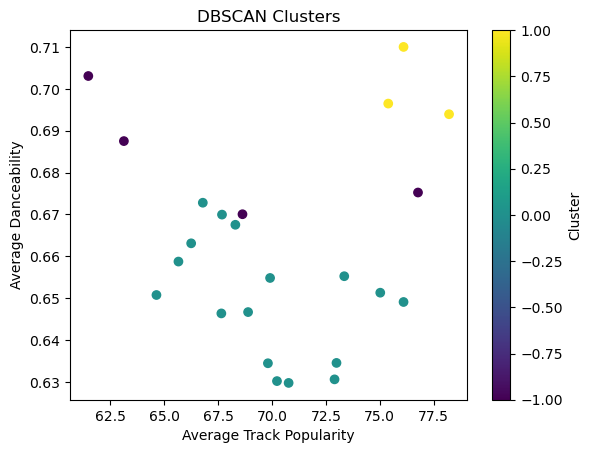

In [12]:
print("Cluster Distribution:")
print(df['cluster'].value_counts())

for cluster in df['cluster'].unique():
    if cluster != -1:  # Ignore noise
        print(f"\nCluster {cluster}:")
        cluster_data = df[df['cluster'] == cluster]
        print(cluster_data[features].describe())

plt.scatter(df['average_track_popularity'], df['average_danceability'], c=df['cluster'], cmap='viridis', marker='o')
plt.xlabel('Average Track Popularity')
plt.ylabel('Average Danceability')
plt.title('DBSCAN Clusters')
plt.colorbar(label='Cluster')
plt.show()

k=2, Silhouette Score=0.418
k=3, Silhouette Score=0.371
k=4, Silhouette Score=0.492
k=5, Silhouette Score=0.445
k=6, Silhouette Score=0.393
k=7, Silhouette Score=0.396
k=8, Silhouette Score=0.372
k=9, Silhouette Score=0.339
k=10, Silhouette Score=0.332


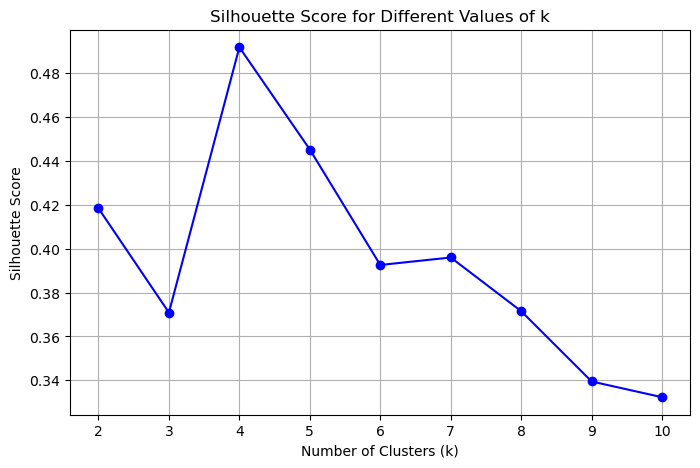


Best k: 4, Best Silhouette Score: 0.492

Cluster Distribution:
3    9
0    8
2    4
1    3
Name: cluster, dtype: int64


In [17]:
features = ['average_track_popularity', 'average_artist_popularity', 'average_danceability']
X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

k_values = range(2, 11)  # Try k from 2 to 10
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)
    print(f"k={k}, Silhouette Score={score:.3f}")

plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Values of k')
plt.grid(True)
plt.xticks(k_values)
plt.show()

best_k = k_values[np.argmax(silhouette_scores)]
best_score = max(silhouette_scores)
print(f"\nBest k: {best_k}, Best Silhouette Score: {best_score:.3f}")

final_kmeans = KMeans(n_clusters=best_k, random_state=42)
df['cluster'] = final_kmeans.fit_predict(X_scaled)

print("\nCluster Distribution:")
print(df['cluster'].value_counts())